# Double gray vs two stream simulations vs HELIOS1D

Running 500 days of double gray, then 10 days of double gray or 10 days of two stream, and compare output

Injecting TSRT TP profile back into HELIOS1D to compare flux calculations

In [1]:
mjolnir_path = "mjolnir"

idx = 1

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
# path to mjolnir code
import sys
sys.path.append(mjolnir_path) 

import pathlib
import re

import h5py
import imageio
import IPython.display as disp


#%matplotlib ipympl
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image, ImageDraw, ImageFont, ImageOps
# from pygifsicle import optimize

import hamarr as ham
import mjolnir_plot_helper as mph
from file_helpers import get_path_matching_regex, get_path_matching_regex_with_groups


In [4]:
from cycler import cycler


import pandas as pd



In [5]:
custom_cycler = (cycler(linestyle=['-', '--', '-.', ':']) * cycler(color=plt.rcParams['axes.prop_cycle'].by_key()['color'])      )

helios_path = pathlib.Path("../HELIOS-orig")

#hlout = get_path_matching_regex_with_groups("../HELIOS-orig/output/", "alf_prof_r5_iso_(\d+)")
hlout = get_path_matching_regex_with_groups("../HELIOS-orig/alfdbg/", "alfprof_(\d+)")

helios_outputs = {}
for p in hlout:
    g = p['groups'][0]
    helios_outputs[g] = f'alfprof_{g}'
    

In [6]:
helios_outputs

{'0': 'alfprof_0',
 '1000': 'alfprof_1000',
 '1200': 'alfprof_1200',
 '1400': 'alfprof_1400',
 '1600': 'alfprof_1600',
 '1800': 'alfprof_1800',
 '200': 'alfprof_200',
 '2000': 'alfprof_2000',
 '2200': 'alfprof_2200',
 '2400': 'alfprof_2400',
 '400': 'alfprof_400',
 '600': 'alfprof_600',
 '800': 'alfprof_800'}

In [7]:

tsrt_path = pathlib.Path("spunup_tsrt_r5_dmp") 
dgrt_path = pathlib.Path("spunup_dgrt") 

planet_name = "Wasp43b"

FIGSIZE_x = 10
FIGSIZE_y = 7
dpi = 100


FIGSIZE = (FIGSIZE_x, FIGSIZE_y)

In [8]:
class Args:
    pass

In [9]:
def plot_quant(args_, pview_, idx_, fig_, ax_):
    stride_ = 1
    overwrite_ = False
    
    args_.pview = [pview_]

    args_.initial_file = [idx_]
    args_.last_file = [idx_]
    args_.pgrid_ref = [f"pgrid_{idx_}_{idx_}_1.txt"]
    
    pgrid_ref_ = pathlib.Path(args_.file[0]) / args_.pgrid_ref[0]
    if pgrid_ref_.exists():
        pass
    else:
        ham.define_Pgrid(args_.file[0],
                     planet_name,
                     args_.initial_file[0],
                     args_.last_file[0],
                     stride_,
                     overwrite=overwrite_,
                )


    mph.make_plot(args_, False, axis=(fig_, ax_))

def update_axis_title(title, ax):
    ttl = ax.get_title()
    ax.set_title(title + " - " + ttl )

In [10]:
tsrt_args = Args()

file_idx = 1

tsrt_args.pview = ["TP"]
tsrt_args.file = [str(tsrt_path)]
tsrt_args.simulation_ID = ["auto"]
tsrt_args.initial_file = [file_idx]
tsrt_args.last_file = [file_idx]
tsrt_args.horizontal_lev = [2.5e2]
tsrt_args.vertical_top = ["default"]
tsrt_args.split_layer = ["no_split"]
tsrt_args.coordinate_sys = ["icoh"]
tsrt_args.lmax_adjust = [0]
tsrt_args.slice = [0, 180]
tsrt_args.maketable = False
tsrt_args.no_pressure_log = False
tsrt_args.latlonswap = False
tsrt_args.vcoord = ["pressure"]
tsrt_args.pgrid_ref = [f"pgrid_{file_idx}_{file_idx}_1.txt"]
tsrt_args.clevels = [40]

In [11]:
dgrt_args = Args()

dgrt_args.pview = ["TP"]
dgrt_args.file = [str(dgrt_path)]
dgrt_args.simulation_ID = ["auto"]
dgrt_args.initial_file = [file_idx]
dgrt_args.last_file = [file_idx]
dgrt_args.horizontal_lev = [2.5e2]
dgrt_args.vertical_top = ["default"]
dgrt_args.split_layer = ["no_split"]
dgrt_args.coordinate_sys = ["icoh"]
dgrt_args.lmax_adjust = [0]
dgrt_args.slice = [0, 180]
dgrt_args.maketable = False
dgrt_args.no_pressure_log = False
dgrt_args.latlonswap = False
dgrt_args.vcoord = ["pressure"]
dgrt_args.pgrid_ref = [f"pgrid_{file_idx}_{file_idx}_1.txt"]
dgrt_args.clevels = [40]

# TP profile

Dataset Pressure has already been loaded into memory
Dataset Pressure has already been loaded into memory


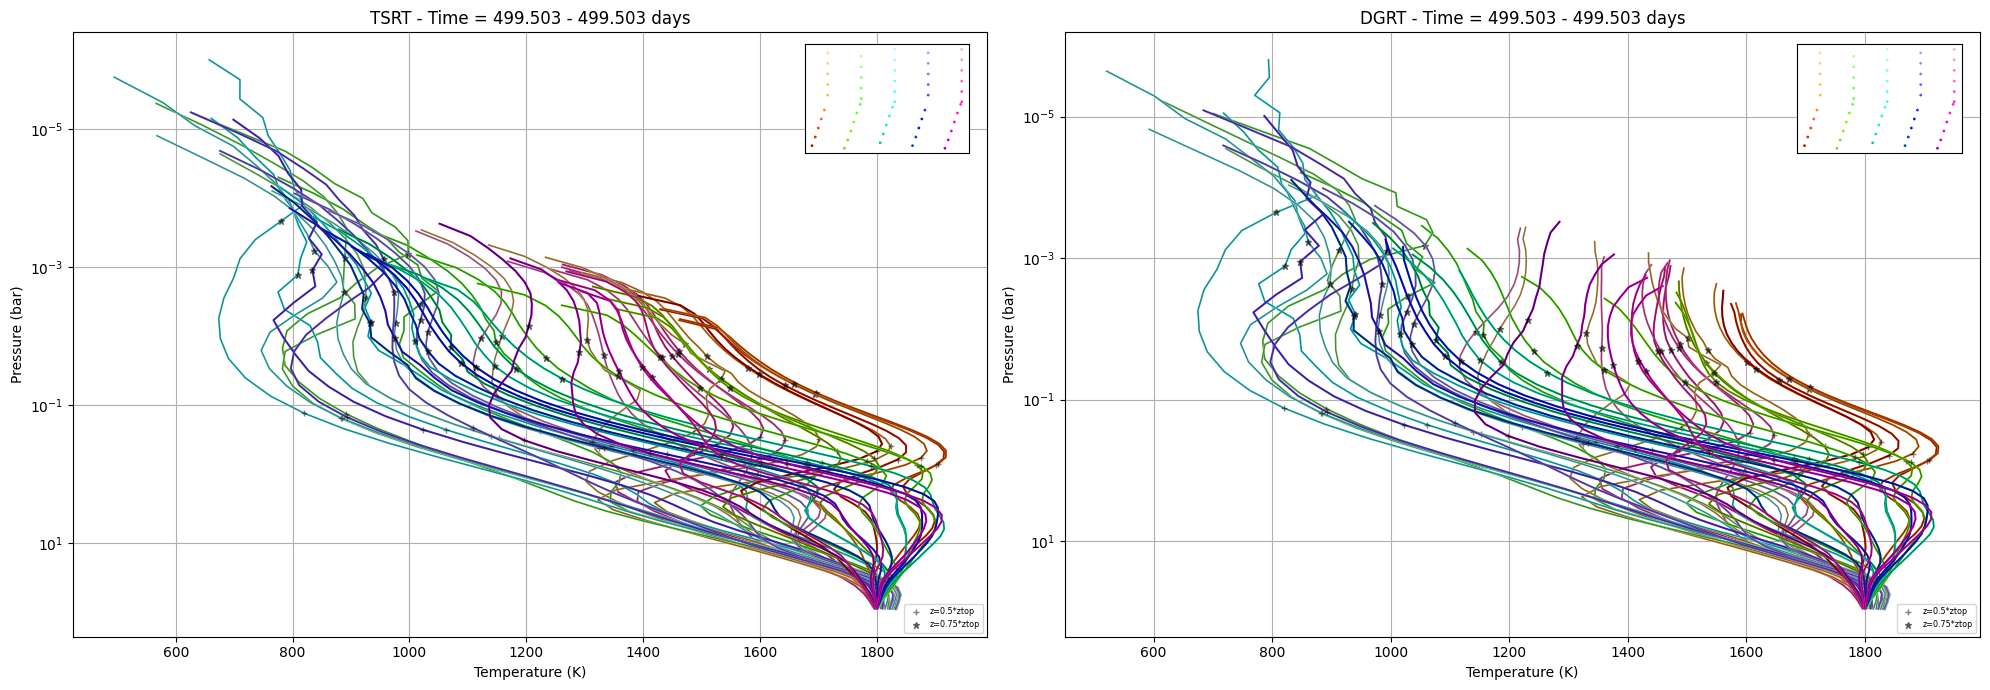

In [12]:

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(2*FIGSIZE_x, FIGSIZE_y), dpi=dpi)

pview = "TP"

#tsrt_args.maketable=True

plot_quant(tsrt_args, pview, idx, fig, ax1)
plot_quant(dgrt_args, pview, idx, fig, ax2)
update_axis_title("TSRT", ax1)
update_axis_title("DGRT", ax2)

#tsrt_args.maketable=False


# Q heat

## at 0.25 bar

spunup_tsrt_r5_dmp/pgrid_1_1_1/regrid_Wasp43b_1.h5 not found, regridding now with default settings...
Regrid data in folder spunup_tsrt_r5_dmp...

Vertical coordinate = pressure from file spunup_tsrt_r5_dmp/pgrid_1_1_1.txt
Regridding time = 1...
Writing file spunup_tsrt_r5_dmp/pgrid_1_1_1/regrid_Wasp43b_1.h5...
Writing file spunup_tsrt_r5_dmp/regrid_height_Wasp43b_1.h5...


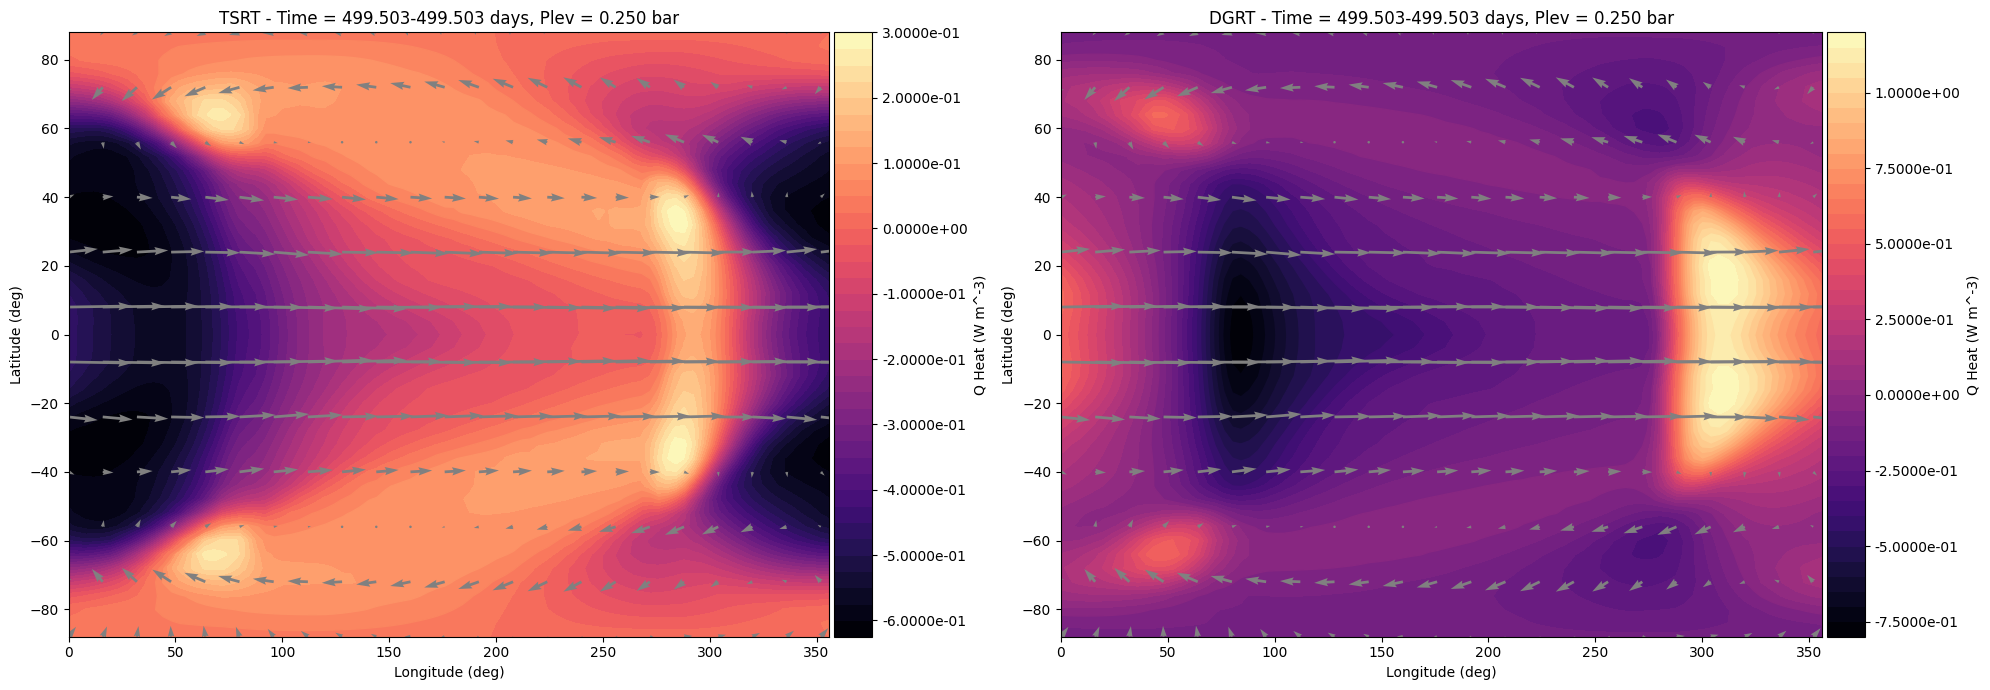

In [13]:

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(2*FIGSIZE_x, FIGSIZE_y), dpi=dpi)

pview = "qheat"

plot_quant(tsrt_args, pview, idx, fig, ax1)
plot_quant(dgrt_args, pview, idx, fig, ax2)

update_axis_title("TSRT", ax1)
update_axis_title("DGRT", ax2)

## Qheat profile

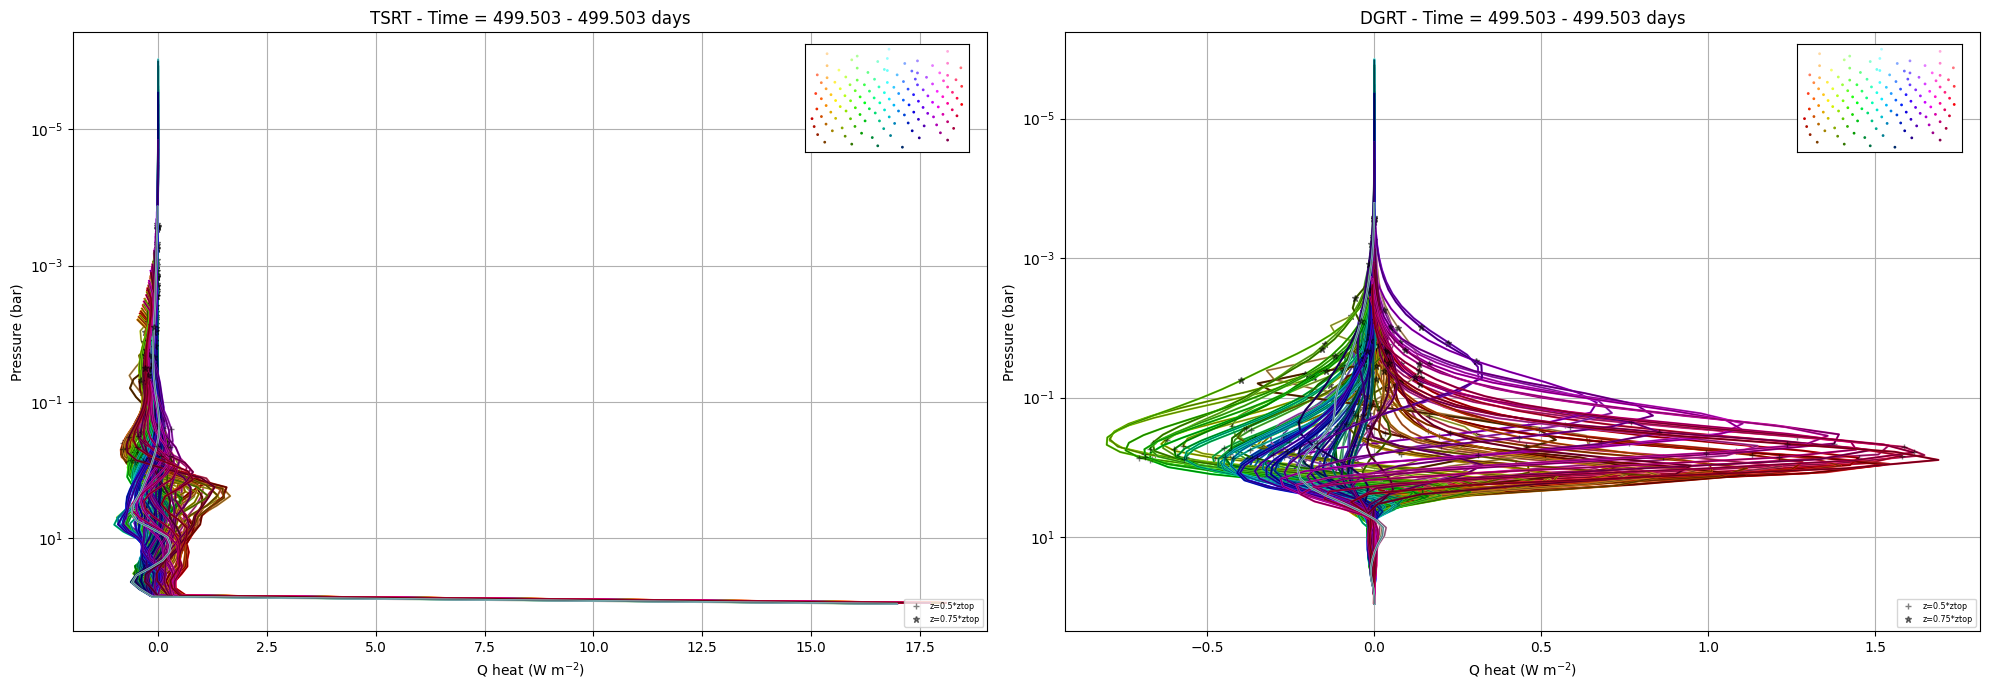

In [14]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(2*FIGSIZE_x, FIGSIZE_y), dpi=dpi)

plot_quant(tsrt_args, "qheatprof", idx, fig, ax1)
plot_quant(dgrt_args, "qheatprof", idx, fig, ax2)

update_axis_title("TSRT", ax1)
update_axis_title("DGRT", ax2)

# Net flux

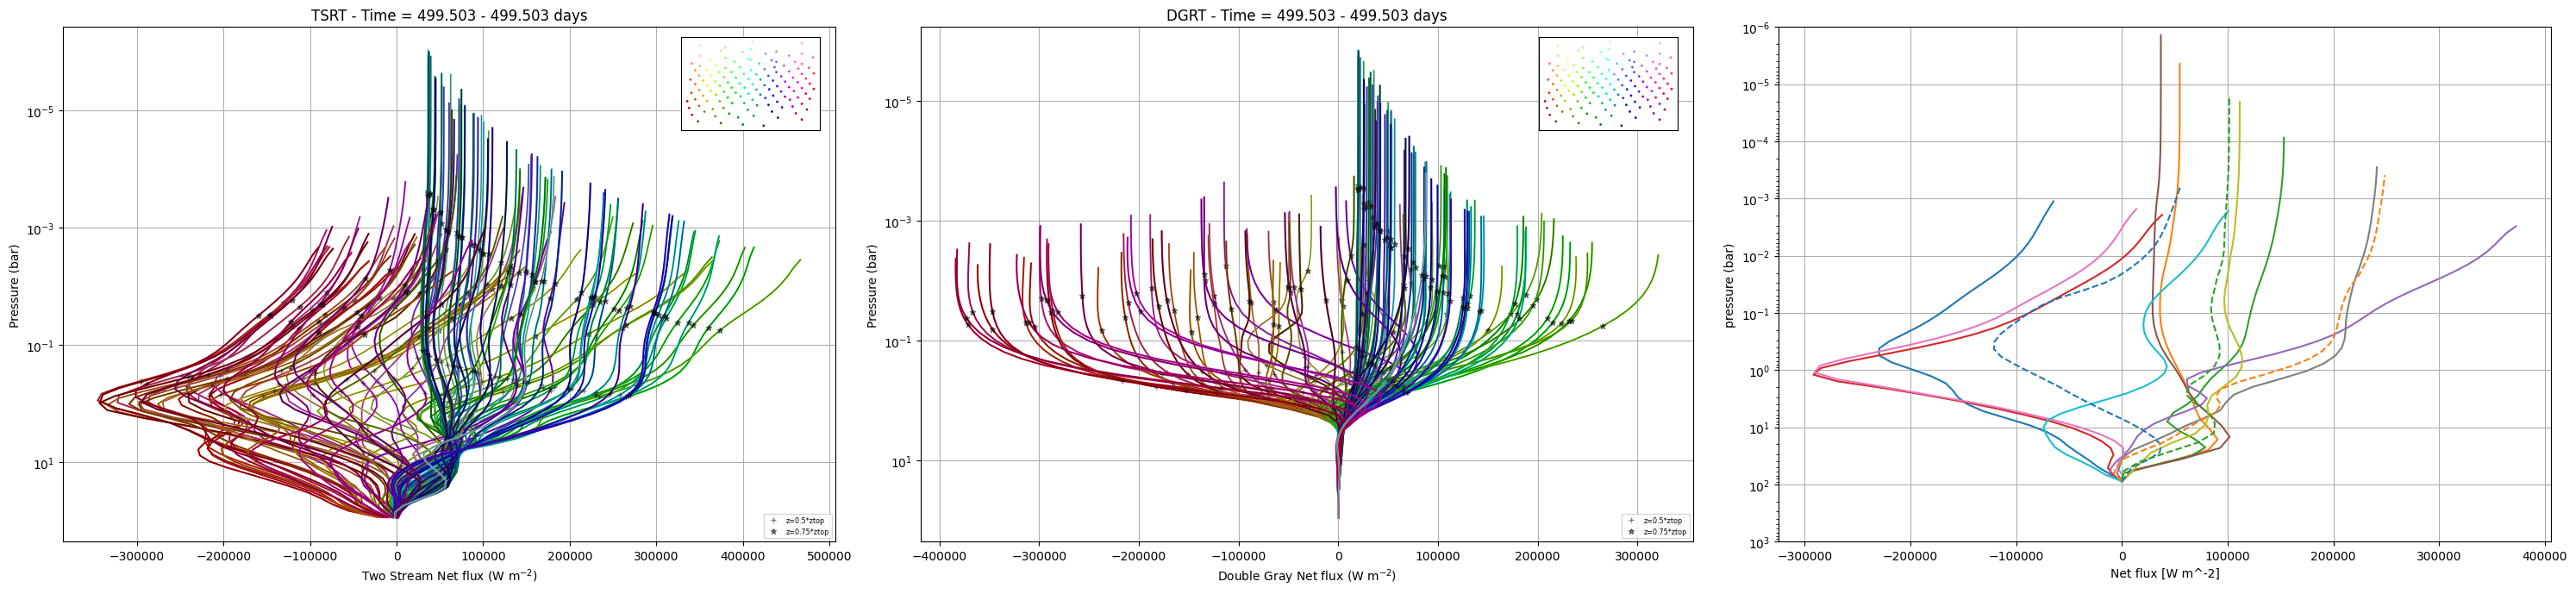

In [15]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(3*FIGSIZE_x, FIGSIZE_y), dpi=dpi)

plot_quant(tsrt_args, "TSfluxprof", idx, fig, ax1)
plot_quant(dgrt_args, "DGfluxprof", idx, fig, ax2)

update_axis_title("TSRT", ax1)
update_axis_title("DGRT", ax2)



ax3.set_prop_cycle(custom_cycler)

for l, d in helios_outputs.items():
    data_path = helios_path / "alfdbg" / d
    tp_dat  = pd.read_csv(data_path / f"{d}_integrated_flux.dat", sep="\s+", skiprows=2, header=0)


    cgs2mks = 1e-3
    ax3.plot(tp_dat['F_net']*cgs2mks, 1e-6*tp_dat['press.[10^-6bar]'], label=l)
    
    
#ax.set(ylim=[1e3, 1e-6], yscale='log', xlabel=r'Net flux [erg s^-1 cm^-2]', ylabel=r'pressure (bar)')
ax3.set(ylim=[1e3, 1e-6], yscale='log', xlabel=r'Net flux [W m^-2]', ylabel=r'pressure (bar)')
# ax.legend()
ax3.grid(True)

# Up and down flux profile

# Upward Profile


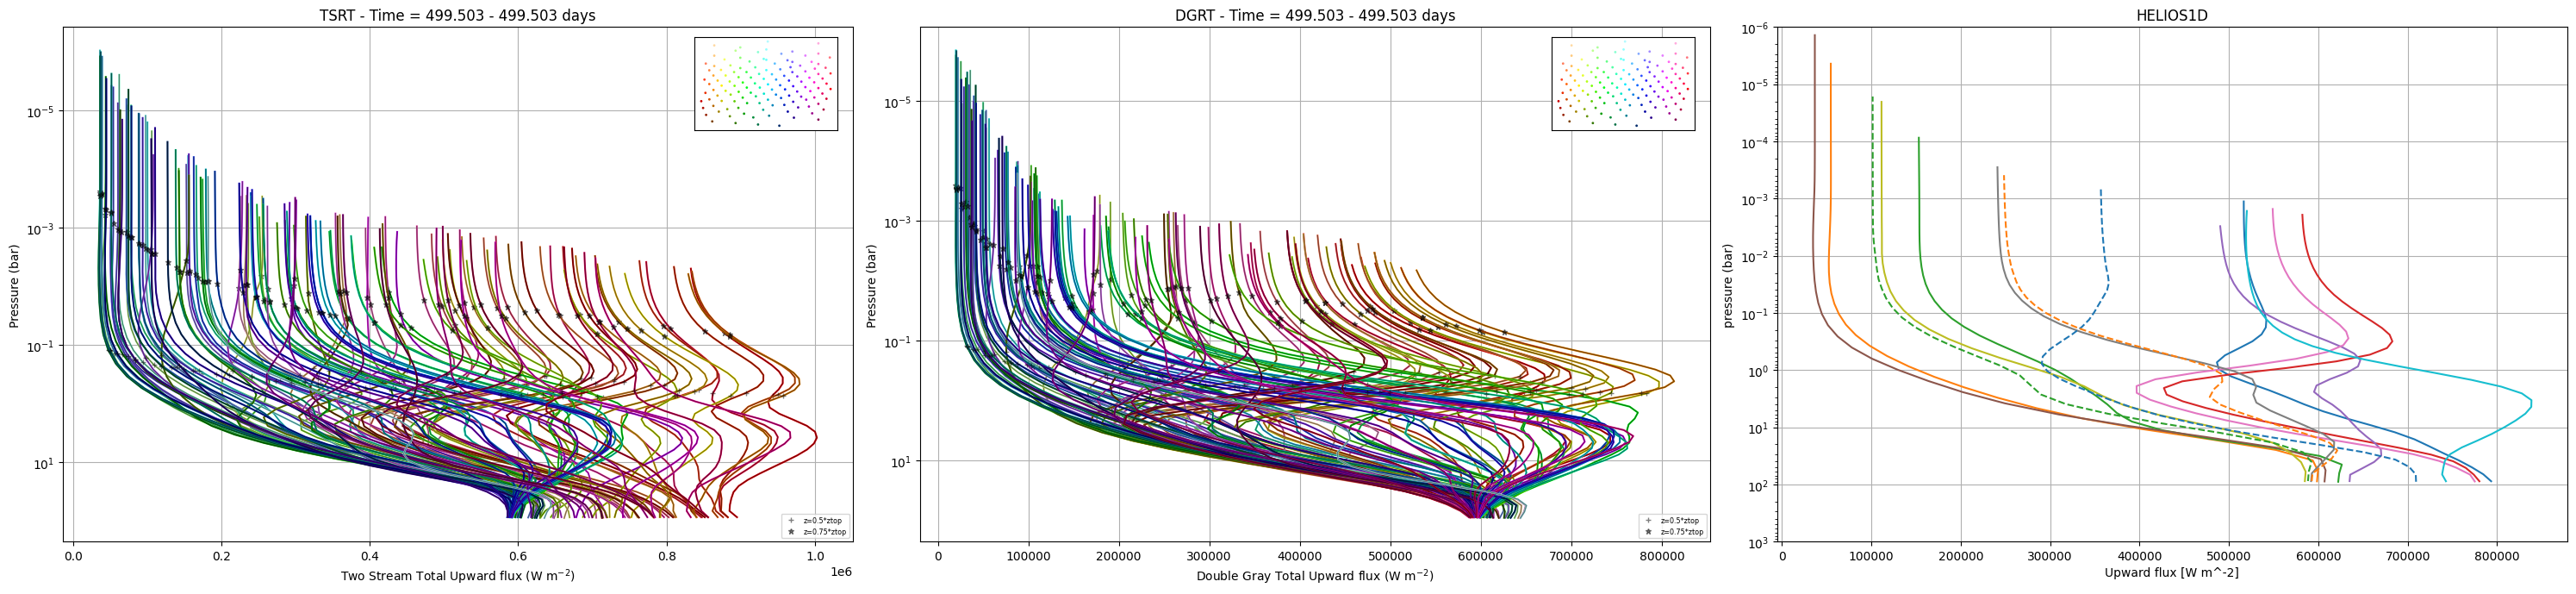

In [16]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(3*FIGSIZE_x, FIGSIZE_y), dpi=dpi)


plot_quant(tsrt_args, "TSfutprof", idx, fig, ax1)
update_axis_title("TSRT", ax1)

plot_quant(dgrt_args, "DGfutprof", idx, fig, ax2)
update_axis_title("DGRT", ax2)


ax3.set_prop_cycle(custom_cycler)

for l, d in helios_outputs.items():
    data_path = helios_path / "alfdbg" / d
    tp_dat  = pd.read_csv(data_path / f"{d}_integrated_flux.dat", sep="\s+", skiprows=2, header=0)


    cgs2mks = 1e-3
    ax3.plot(tp_dat['F_up']*cgs2mks, 1e-6*tp_dat['press.[10^-6bar]'], label=l)
    
#ax.set(ylim=[1e3, 1e-6], yscale='log', xlabel=r'Net flux [erg s^-1 cm^-2]', ylabel=r'pressure (bar)')
ax3.set(ylim=[1e3, 1e-6], yscale='log', xlabel=r'Upward flux [W m^-2]', ylabel=r'pressure (bar)')
# ax.legend()
ax3.grid(True)
ax3.set_title("HELIOS1D")
pass





# Downward flux

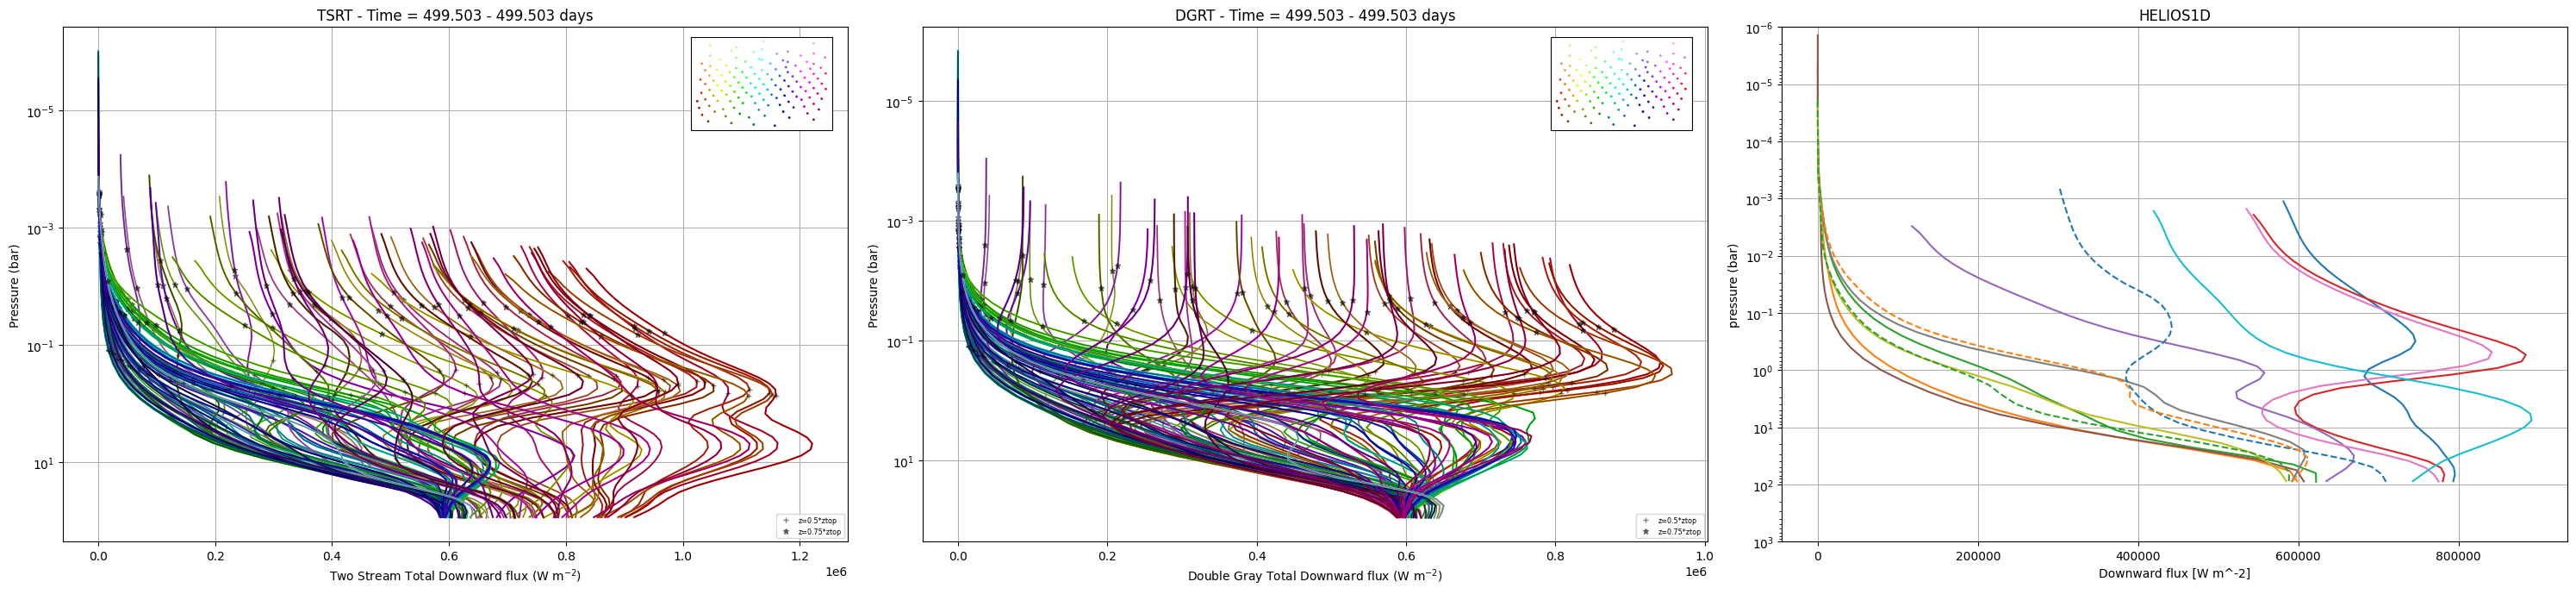

In [17]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(3*FIGSIZE_x, FIGSIZE_y), dpi=dpi)

plot_quant(tsrt_args, "TSfdtprof", idx, fig, ax1)
update_axis_title("TSRT", ax1)


plot_quant(dgrt_args, "DGfdtprof", idx, fig, ax2)
update_axis_title("DGRT", ax2)






ax3.set_prop_cycle(custom_cycler)

for l, d in helios_outputs.items():
    data_path = helios_path / "alfdbg" / d
    tp_dat  = pd.read_csv(data_path / f"{d}_integrated_flux.dat", sep="\s+", skiprows=2, header=0)


    cgs2mks = 1e-3
    ax3.plot(tp_dat['F_down']*cgs2mks, 1e-6*tp_dat['press.[10^-6bar]'], label=l)
    
#ax.set(ylim=[1e3, 1e-6], yscale='log', xlabel=r'Net flux [erg s^-1 cm^-2]', ylabel=r'pressure (bar)')
ax3.set(ylim=[1e3, 1e-6], yscale='log', xlabel=r'Downward flux [W m^-2]', ylabel=r'pressure (bar)')
# ax.legend()
ax3.grid(True)
ax3.set_title("HELIOS1D")

pass

# Helios 1D

In [18]:
#helios_tools = helios_path 
#sys.path.append(str(helios_path / "tools")) 

#import heliostools as htls

# TP plots at various angles

plots by angle to zenith. 

night side is:
 - no direct beam.
 - stellar spectrum (used for TOA flux) set to planck(T=0K)
 
Or for post processing version ("pp"):

 - no direct beam.
 - stellar spectrum set to planck(0K)
 - TP profile from one of the dayside profile (zenith = 0°, 89°). 
 - only runs HELIOS in post processing mode. Doesn't change the TP profile, outputs computed flux
    

FileNotFoundError: [Errno 2] File ../HELIOS-orig/alfdbg/wasp43b_0d/wasp43b_0d_tp.dat does not exist: '../HELIOS-orig/alfdbg/wasp43b_0d/wasp43b_0d_tp.dat'

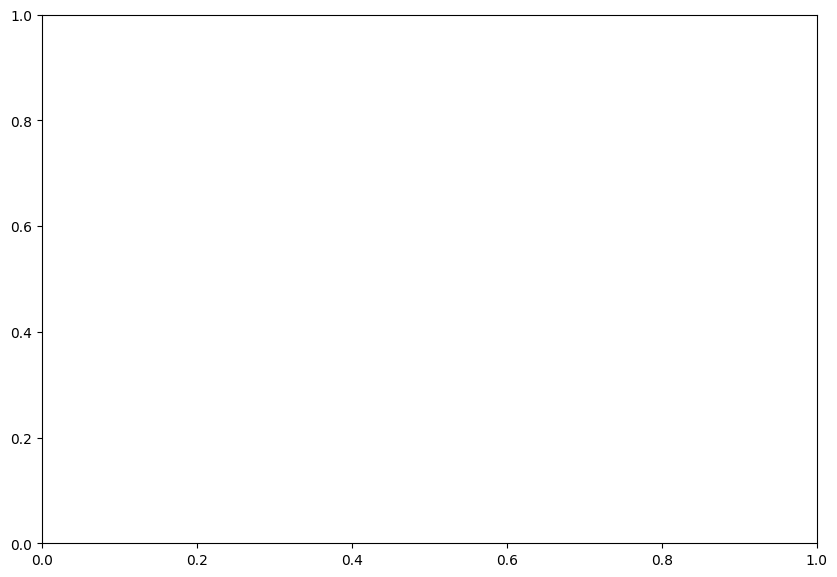

In [19]:
fig, ax = plt.subplots(1, 1, figsize=(1*FIGSIZE_x, FIGSIZE_y), dpi=dpi)

l = {"0": "wasp43b_0d",
    "10": "wasp43b_10d",
    "20": "wasp43b_20d",
    "30": "wasp43b_30d",
    "40": "wasp43b_40d",
    "50": "wasp43b_50d",
    "60": "wasp43b_60d",
    "70": "wasp43b_70d",
    "80": "wasp43b_80d",
    "89": "wasp43b_89d",
    "night": "wasp43b_nightd",    
     "nightpp": "wasp43b_nightppd",
     "nightpp_89": "wasp43b_nightpp_89d"            
    }


ax.set_prop_cycle(custom_cycler)

for l, d in l.items():
    data_path = helios_path / "alfdbg" / d
    tp_dat  = pd.read_csv(data_path / f"{d}_tp.dat", sep="\s+", skiprows=1, header=0)



    ax.plot(tp_dat['temp.[K]'], 1e-6*tp_dat['press.[10^-6bar]'], label=l)
    
ax.set(ylim=[1e3, 1e-6], yscale='log', xlabel=r'temperature (K)', ylabel=r'pressure (bar)')
ax.legend()
ax.grid(True)


# Downward flux

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(1*FIGSIZE_x, FIGSIZE_y), dpi=dpi)

l = {"0": "wasp43b_0d",
    "10": "wasp43b_10d",
    "20": "wasp43b_20d",
    "30": "wasp43b_30d",
    "40": "wasp43b_40d",
    "50": "wasp43b_50d",
    "60": "wasp43b_60d",
    "70": "wasp43b_70d",
    "80": "wasp43b_80d",
    "89": "wasp43b_89d",
    "night": "wasp43b_nightd",    
     "nightpp": "wasp43b_nightppd",
     "nightpp_89": "wasp43b_nightpp_89d"        
    }

ax.set_prop_cycle(custom_cycler)

for l, d in l.items():
    data_path = helios_path / "alfdbg" / d
    tp_dat  = pd.read_csv(data_path / f"{d}_integrated_flux.dat", sep="\s+", skiprows=2, header=0)


    cgs2mks=1e-3
    ax.plot(tp_dat['F_down']*cgs2mks, 1e-6*tp_dat['press.[10^-6bar]'], label=l)
    
ax.set(ylim=[1e3, 1e-6], yscale='log', xlabel=r'Downward flux [W m^-2]', ylabel=r'pressure (bar)')
ax.legend()
ax.grid(True)

# Upward flux

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(1*FIGSIZE_x, FIGSIZE_y), dpi=dpi)

l = {"0": "wasp43b_0d",
    "10": "wasp43b_10d",
    "20": "wasp43b_20d",
    "30": "wasp43b_30d",
    "40": "wasp43b_40d",
    "50": "wasp43b_50d",
    "60": "wasp43b_60d",
    "70": "wasp43b_70d",
    "80": "wasp43b_80d",
    "89": "wasp43b_89d",
    "night": "wasp43b_nightd",    
     "nightpp": "wasp43b_nightppd",
     "nightpp_89": "wasp43b_nightpp_89d"            
    }

ax.set_prop_cycle(custom_cycler)

for l, d in l.items():
    data_path = helios_path / "alfdbg" / d
    tp_dat  = pd.read_csv(data_path / f"{d}_integrated_flux.dat", sep="\s+", skiprows=2, header=0)


    cgs2mks = 1e-3
    ax.plot(tp_dat['F_up']*cgs2mks, 1e-6*tp_dat['press.[10^-6bar]'], label=l)
    
ax.set(ylim=[1e3, 1e-6], yscale='log', xlabel=r'Upward flux [W m^-2]', ylabel=r'pressure (bar)')
ax.legend()
ax.grid(True)

# Net flux

without post processed night spectrum

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(1*FIGSIZE_x, FIGSIZE_y), dpi=dpi)

l = {"0": "wasp43b_0d",
    "10": "wasp43b_10d",
    "20": "wasp43b_20d",
    "30": "wasp43b_30d",
    "40": "wasp43b_40d",
    "50": "wasp43b_50d",
    "60": "wasp43b_60d",
    "70": "wasp43b_70d",
    "80": "wasp43b_80d",
    "89": "wasp43b_89d",
    "night": "wasp43b_nightd",
     #"nightpp_89": "wasp43b_nightpp_89d"    
    }

ax.set_prop_cycle(custom_cycler)

for l, d in l.items():
    data_path = helios_path / "alfdbg" / d
    tp_dat  = pd.read_csv(data_path / f"{d}_integrated_flux.dat", sep="\s+", skiprows=2, header=0)


    cgs2mks = 1e-3
    ax.plot(tp_dat['F_net']*cgs2mks, 1e-6*tp_dat['press.[10^-6bar]'], label=l)
    

ax.set(ylim=[1e3, 1e-6], yscale='log', xlabel=r'Net flux [W m^-2]', ylabel=r'pressure (bar)')
ax.legend()
ax.grid(True)

with post processed night spectrum

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(1*FIGSIZE_x, FIGSIZE_y), dpi=dpi)

l = {"0": "wasp43b_0d",
    "10": "wasp43b_10d",
    "20": "wasp43b_20d",
    "30": "wasp43b_30d",
    "40": "wasp43b_40d",
    "50": "wasp43b_50d",
    "60": "wasp43b_60d",
    "70": "wasp43b_70d",
    "80": "wasp43b_80d",
    "89": "wasp43b_89d",
    "night": "wasp43b_nightd",    
     "nightpp_0": "wasp43b_nightppd",
     "nightpp_89": "wasp43b_nightpp_89d"    
    }

ax.set_prop_cycle(custom_cycler)

for l, d in l.items():
    data_path = helios_path / "alfdbg" / d
    tp_dat  = pd.read_csv(data_path / f"{d}_integrated_flux.dat", sep="\s+", skiprows=2, header=0)


    cgs2mks = 1e-3
    ax.plot(tp_dat['F_net']*cgs2mks, 1e-6*tp_dat['press.[10^-6bar]'], label=l)
    
#ax.set(ylim=[1e3, 1e-6], yscale='log', xlabel=r'Net flux [erg s^-1 cm^-2]', ylabel=r'pressure (bar)')
ax.set(ylim=[1e3, 1e-6], yscale='log', xlabel=r'Net flux [W m^-2]', ylabel=r'pressure (bar)')
ax.legend()
ax.grid(True)

with only 89 degree day side TP profile used for night side

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(1*FIGSIZE_x, FIGSIZE_y), dpi=dpi)

l = {"0": "wasp43b_0d",
    "10": "wasp43b_10d",
    "20": "wasp43b_20d",
    "30": "wasp43b_30d",
    "40": "wasp43b_40d",
    "50": "wasp43b_50d",
    "60": "wasp43b_60d",
    "70": "wasp43b_70d",
    "80": "wasp43b_80d",
    "89": "wasp43b_89d",
    "night": "wasp43b_nightd",    
     #"nightpp_0": "wasp43b_nightppd",
     "nightpp_89": "wasp43b_nightpp_89d"    
    }

ax.set_prop_cycle(custom_cycler)

for l, d in l.items():
    data_path = helios_path / "alfdbg" / d
    tp_dat  = pd.read_csv(data_path / f"{d}_integrated_flux.dat", sep="\s+", skiprows=2, header=0)


    cgs2mks = 1e-3
    ax.plot(tp_dat['F_net']*cgs2mks, 1e-6*tp_dat['press.[10^-6bar]'], label=l)
    
#ax.set(ylim=[1e3, 1e-6], yscale='log', xlabel=r'Net flux [erg s^-1 cm^-2]', ylabel=r'pressure (bar)')
ax.set(ylim=[1e3, 1e-6], yscale='log', xlabel=r'Net flux [W m^-2]', ylabel=r'pressure (bar)')
ax.legend()
ax.grid(True)

In [ ]:
# THOR TP profile injected into HELIOS

## Inject TP profiles from THOR into HELIOS and generate fluxes

In [ ]:
# Net flux

In [ ]:
#fig, ax = plt.subplots(1, 1, figsize=(1*FIGSIZE_x, FIGSIZE_y), dpi=dpi)
#
#ax.set_prop_cycle(custom_cycler)

#for l, d in outputs.items():
#    data_path = helios_path / "output" / d
#    tp_dat  = pd.read_csv(data_path / f"{d}_integrated_flux.dat", sep="\s+", skiprows=2, header=0)


#    cgs2mks = 1e-3
#    ax.plot(tp_dat['F_net']*cgs2mks, 1e-6*tp_dat['press.[10^-6bar]'], label=l)
    
##ax.set(ylim=[1e3, 1e-6], yscale='log', xlabel=r'Net flux [erg s^-1 cm^-2]', ylabel=r'pressure (bar)')
#ax.set(ylim=[1e3, 1e-6], yscale='log', xlabel=r'Net flux [W m^-2]', ylabel=r'pressure (bar)')
## ax.legend()
#ax.grid(True)

In [ ]:
# Upward and Downward flux


In [ ]:
#fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(2*FIGSIZE_x, FIGSIZE_y), dpi=dpi)
#
#ax1.set_prop_cycle(custom_cycler)
#
#for l, d in outputs.items():
#    data_path = helios_path / "output" / d
#    tp_dat  = pd.read_csv(data_path / f"{d}_integrated_flux.dat", sep="\s+", skiprows=2, header=0)
#
#
#    cgs2mks = 1e-3
#    ax1.plot(tp_dat['F_up']*cgs2mks, 1e-6*tp_dat['press.[10^-6bar]'], label=l)
    
##ax.set(ylim=[1e3, 1e-6], yscale='log', xlabel=r'Net flux [erg s^-1 cm^-2]', ylabel=r'pressure (bar)')
#ax1.set(ylim=[1e3, 1e-6], yscale='log', xlabel=r'Upward flux [W m^-2]', ylabel=r'pressure (bar)')
## ax.legend()
#ax1.grid(True)
#
#ax2.set_prop_cycle(custom_cycler)
#
#for l, d in outputs.items():
#    data_path = helios_path / "output" / d
#    tp_dat  = pd.read_csv(data_path / f"{d}_integrated_flux.dat", sep="\s+", skiprows=2, header=0)
#

#    cgs2mks = 1e-3
#    ax2.plot(tp_dat['F_down']*cgs2mks, 1e-6*tp_dat['press.[10^-6bar]'], label=l)
    
##ax.set(ylim=[1e3, 1e-6], yscale='log', xlabel=r'Net flux [erg s^-1 cm^-2]', ylabel=r'pressure (bar)')
#ax2.set(ylim=[1e3, 1e-6], yscale='log', xlabel=r'Downward flux [W m^-2]', ylabel=r'pressure (bar)')
## ax.legend()
#ax2.grid(True)

In [ ]:
# TP profile

In [ ]:
#fig, ax = plt.subplots(1, 1, figsize=(1*FIGSIZE_x, FIGSIZE_y), dpi=dpi)
#
#ax.set_prop_cycle(custom_cycler)
#
#for l, d in outputs.items():
#    data_path = helios_path / "output" / d
#    tp_dat  = pd.read_csv(data_path / f"{d}_tp.dat", sep="\s+", skiprows=1, header=0)
#
#
#
#    ax.plot(tp_dat['temp.[K]'], 1e-6*tp_dat['press.[10^-6bar]'], label=l)
    
#ax.set(ylim=[1e3, 1e-6], yscale='log', xlabel=r'temperature (K)', ylabel=r'pressure (bar)')
#ax.legend()
#ax.grid(True)

# Planck function

In [ ]:
plkout = get_path_matching_regex_with_groups("dbgdump/", "planck_(\d+).dat")

planck_outputs = {}
for p in plkout:
    g = p['groups'][0]
    planck_outputs[int(g)] = p['path']
    
# read matching idx

planck_data = pd.read_csv(planck_outputs[idx], sep='\s+', dtype={'col': np.int32, 'pressure': np.float64, 'temperature': np.float64, 'planck': np.float64})

In [ ]:
fig, ((ax1, ax2 ), (ax3,ax4), (ax5,ax6)) = plt.subplots(3, 2, figsize=(2*FIGSIZE_x, 3*FIGSIZE_y), dpi=dpi)

#plot_quant(tsrt_args, "planck", idx, fig, ax1)
#update_axis_title("TSRT", ax1)


stride = 50


ax3.set_prop_cycle(custom_cycler)

for c in range(0, 2562, stride):
    data = planck_data[planck_data['col'] == c]
    
    pressure = data['pressure']/100000
    temperature = data['temperature']
    planck_val = data['planck']
    
    ax1.plot(planck_val, pressure, label=l)
    ax3.plot(planck_val, temperature, label=l)
    ax5.plot(temperature, pressure, label=l)

##ax.set(ylim=[1e3, 1e-6], yscale='log', xlabel=r'Net flux [erg s^-1 cm^-2]', ylabel=r'pressure (bar)')
#ax2.set(ylim=[1e3, 1e-6], yscale='log', xlabel=r'Planck', ylabel=r'pressure (bar)')
ax1.set(yscale='log', xscale='log', xlabel=r'Planck', ylabel=r'pressure (bar)')
ax1.invert_yaxis()
## ax.legend()
ax1.grid(True)
ax1.set_title("TSRT")


ax3.set(yscale='linear', xscale='linear', xlabel=r'Planck', ylabel=r'temperature[K]')
ax3.invert_yaxis()
## ax.legend()
ax3.grid(True)
ax3.set_title("TSRT")

ax5.set(yscale='log', xscale='linear', xlabel=r'temperature [K]', ylabel=r'pressure (bar)')
ax5.invert_yaxis()
## ax.legend()
ax5.grid(True)
ax5.set_title("TSRT")

    
for l, d in helios_outputs.items():
    data_path = helios_path / "output" / d
    dat  = pd.read_csv(data_path / f"{d}_planck_cent.dat", sep="\s+", skiprows=2, header=0)
    
    
    pl = ((1e-1*dat.loc[:,'B_lay[0]':'B_lay[104]']).multiply(1e-6*dat['delta_lambda[um]'], axis='index')).sum().values
    
    
    
    tp_dat  = pd.read_csv(data_path / f"{d}_tp.dat", sep="\s+", skiprows=1, header=0)


    
    pr =  1e-6*(tp_dat['press.[10^-6bar]'].values[1:])
    temp =  (tp_dat['temp.[K]'].values[1:])


    ax2.plot(pl, pr, label=l)
    ax4.plot(pl, temp, label=l)
    ax6.plot(temp, pr, label=l)
    
    
ax2.set(yscale='log', xscale='log', xlabel=r'Planck', ylabel=r'pressure (bar)')
ax2.invert_yaxis()
## ax.legend()
ax2.grid(True)
ax2.set_title("HELIOS1D")

ax4.set(yscale='linear', xscale='linear', xlabel=r'Planck', ylabel=r'temperature [K]')
ax4.invert_yaxis()
## ax.legend()
ax4.grid(True)
ax4.set_title("HELIOS1D")

ax6.set(yscale='log', xscale='linear', xlabel=r'temperature', ylabel=r'pressure (bar)')
ax6.invert_yaxis()
## ax.legend()
ax6.grid(True)
ax6.set_title("HELIOS1D")

pass

In [ ]:
planck_data[planck_data['col'] == 500]

## Planck grid comparison


In [ ]:
plk_grd = pd.read_csv("planckgrid.txt", sep='\s+', header=None, names=['d','n', 'planck', 'lambda', 'delta_lambda'])

In [ ]:
plk_grd['T'] = plk_grd['d']*2 

In [ ]:
T = 50
lmbda = plk_grd[plk_grd['T'] == T]['lambda']
plk = plk_grd[plk_grd['T'] == T]['planck']

In [ ]:
hl_plk = pd.read_csv('../HELIOS-orig/hlplancktable.txt', sep='\s+', header=None, names=['d','n', 'planck', 'lambda', 'delta_lambda'])
hl_plk['T'] = hl_plk['d']*2 

hl_lmbda = hl_plk[hl_plk['T'] == T]['lambda']
hl_plk = hl_plk[hl_plk['T'] == T]['planck']

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(1*FIGSIZE_x, FIGSIZE_y), dpi=dpi)

ax.plot(lmbda, plk, label="TH")

ax.set(yscale='linear', xscale='log', xlabel=r'Planck', ylabel=r'pressure (bar)')


ax.plot(hl_lmbda*1e-2, hl_plk*1e-1, label="HL")

ax.set(yscale='linear', xscale='log', xlabel=r'Planck', ylabel=r'pressure (bar)')

ax.legend()

In [ ]:
hl_plk = pd.read_csv('../HELIOS-orig/hlplancktable.txt', sep='\s+', header=None, names=['d','n', 'planck', 'lambda', 'delta_lambda'])


In [ ]:
plk_grd[plk_grd['d'] == 7998]

In [ ]:
hl_plk[hl_plk['d'] == 7998][0:34]

In [ ]:
int_plk = []
for i in range(8000):
    ww = plk_grd[plk_grd['d'] == i]
    p = ww['planck'].multiply(ww['delta_lambda']).sum()
    int_plk.append(p)

In [ ]:
int_hl_plk = []
for i in range(7999):
    ww = hl_plk[hl_plk['d'] == i][0:34]
    p = (ww['planck']*0.1).multiply(ww['delta_lambda']*0.01).sum()
    int_hl_plk.append(p)

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(1*FIGSIZE_x, FIGSIZE_y), dpi=dpi)

#ax.plot(int_plk, label="TH")
#ax.plot(int_hl_plk, label="HL")
ax.plot(np.array(int_hl_plk)/(np.array(int_plk[0:7999])), label="HL")
#ax.plot((np.array(int_plk[0:7999]))/np.array(int_hl_plk), label="HL")

#ax.set_yscale('log')

ax.set_xlim(0,100)
ax.legend()

# PLANCKLAY dump

In [ ]:
 

#pl_hl_r = pd.read_csv('../HELIOS-orig/plancklay.txt', sep='\s+', header=None, names=['i','l', 'planck', 'T'])
#pl_th_r = pd.read_csv('./plancklay.txt', sep='\s+', header=None, names=['i','l', 'planck', 'T'])

#pl_hl_r['planck'] = pl_hl_r['planck']*0.1



In [ ]:
##n_bin = 10
##pl_hl = pl_hl_r[pl_hl_r['l'] == n_bin]
##pl_th = pl_th_r[pl_th_r['l'] == n_bin]
#pl_hl = pl_hl_r
#pl_th = pl_th_r

In [ ]:

##fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(2*FIGSIZE_x, FIGSIZE_y), dpi=dpi)
#fig, ax = plt.subplots(1, 1, figsize=(1*FIGSIZE_x, FIGSIZE_y), dpi=dpi)
#
#ax.scatter(pl_th['T'], pl_th['planck'], label="TH", s=0.2)
#ax.scatter(pl_hl['T'], pl_hl['planck'], label="HL", s=0.2)
#
#ax.set_ylim(0,1e11)
#lim = 1.0e11
##ax1.set_ylim(0, lim)
##ax2.set_ylim(0, lim)

##ax1.set_xlim(1400,1800)
##ax2.set_xlim(1400,1800)
##ax.set(yscale='linear', xscale='log', xlabel=r'Planck', ylabel=r'pressure (bar)')


##ax.plot(hl_lmbda*1e-2, hl_plk*1e-1, label="HL")

##ax.set(yscale='linear', xscale='log', xlabel=r'Planck', ylabel=r'pressure (bar)')

#ax.legend()


In [ ]:
#pl_th